In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("../lange_migrant_mother.jpg")

def show_image(img, h, w, size):
    plt.figure(figsize=(12, 10))
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img,  cmap=plt.cm.gray)
    plt.title("height: %s width: %s size: %s" % (h, w, size))

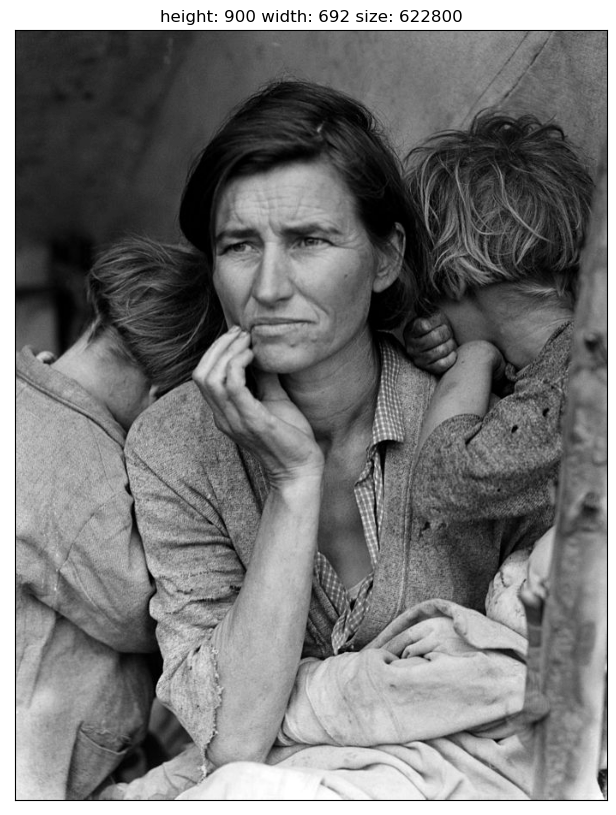

In [7]:
show_image(img, img.size[1], img.size[0], img.size[0]*img.size[1])

In [10]:
import numpy as np
print('Before reshaping:', img.size)
image_array = np.array(img.getdata(), np.uint8).reshape((img.size[1], img.size[0]))
print('After reshaping:', image_array.shape )

Before reshaping: (692, 900)
After reshaping: (900, 692)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(image_array)

PCA(n_components=50)

In [12]:
pca.components_.shape

(50, 692)

In [13]:
pca.explained_variance_ratio_

array([0.47304963, 0.1281772 , 0.09398614, 0.05163205, 0.03208675,
       0.02249176, 0.01838176, 0.01489537, 0.01297648, 0.01056557,
       0.00931143, 0.00778975, 0.00703793, 0.00594134, 0.00562516,
       0.00547761, 0.00486829, 0.00431924, 0.00401961, 0.00366617,
       0.00330617, 0.00303809, 0.00289611, 0.00251274, 0.00239563,
       0.00222432, 0.00201078, 0.00197097, 0.00185998, 0.00182421,
       0.00169807, 0.0016067 , 0.00152938, 0.00150396, 0.00145237,
       0.00135394, 0.00120389, 0.00118387, 0.00117508, 0.0011261 ,
       0.00111495, 0.00108893, 0.00103313, 0.00097169, 0.00091372,
       0.00091079, 0.00087746, 0.00086608, 0.00082656, 0.00080442])

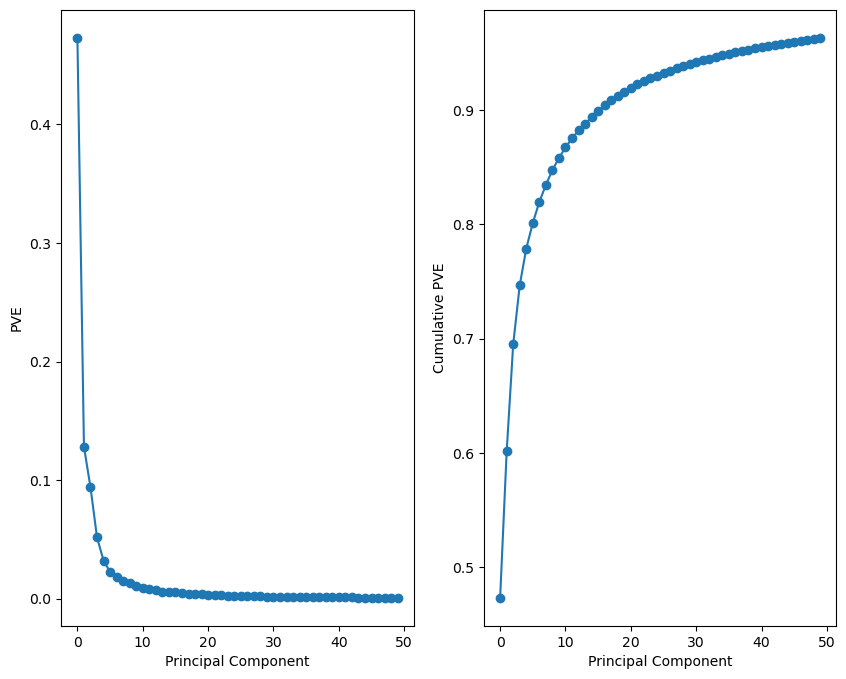

In [16]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

In [40]:
np.tile(pca.components_[0], 50).reshape((50, -1)).T

(692, 50)

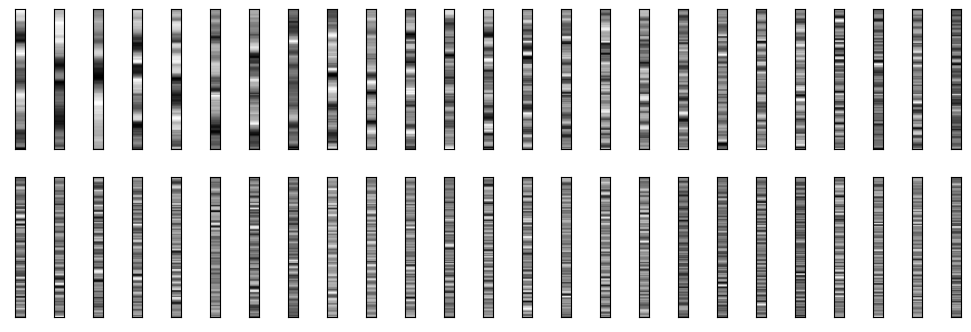

In [46]:
col_width = 50
plt.figure(figsize=(0.5 * 25, 2 * 2))
for component in range(pca.components_.shape[0]):
    plt.subplot(2, 25 , component + 1)
    comp_col = np.tile(pca.components_[component], col_width).reshape((col_width, -1)).T
    plt.imshow(comp_col, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

In [47]:
image_pca = pca.transform(image_array)
print(image_pca.shape)

(900, 50)


In [48]:
image_pca = pca.transform(image_array)
reduced_image = pca.inverse_transform(image_pca)

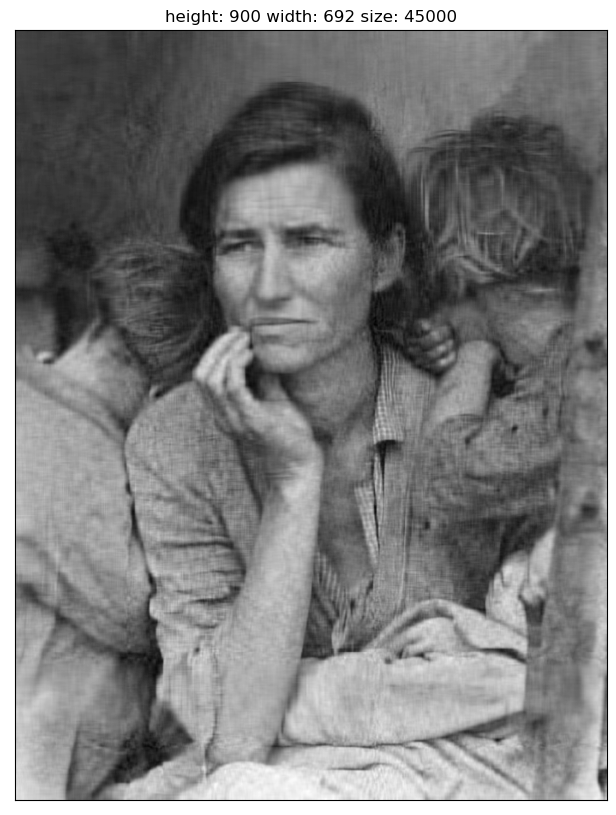

In [49]:
show_image(reduced_image, reduced_image.shape[0], reduced_image.shape[1], image_pca.size)

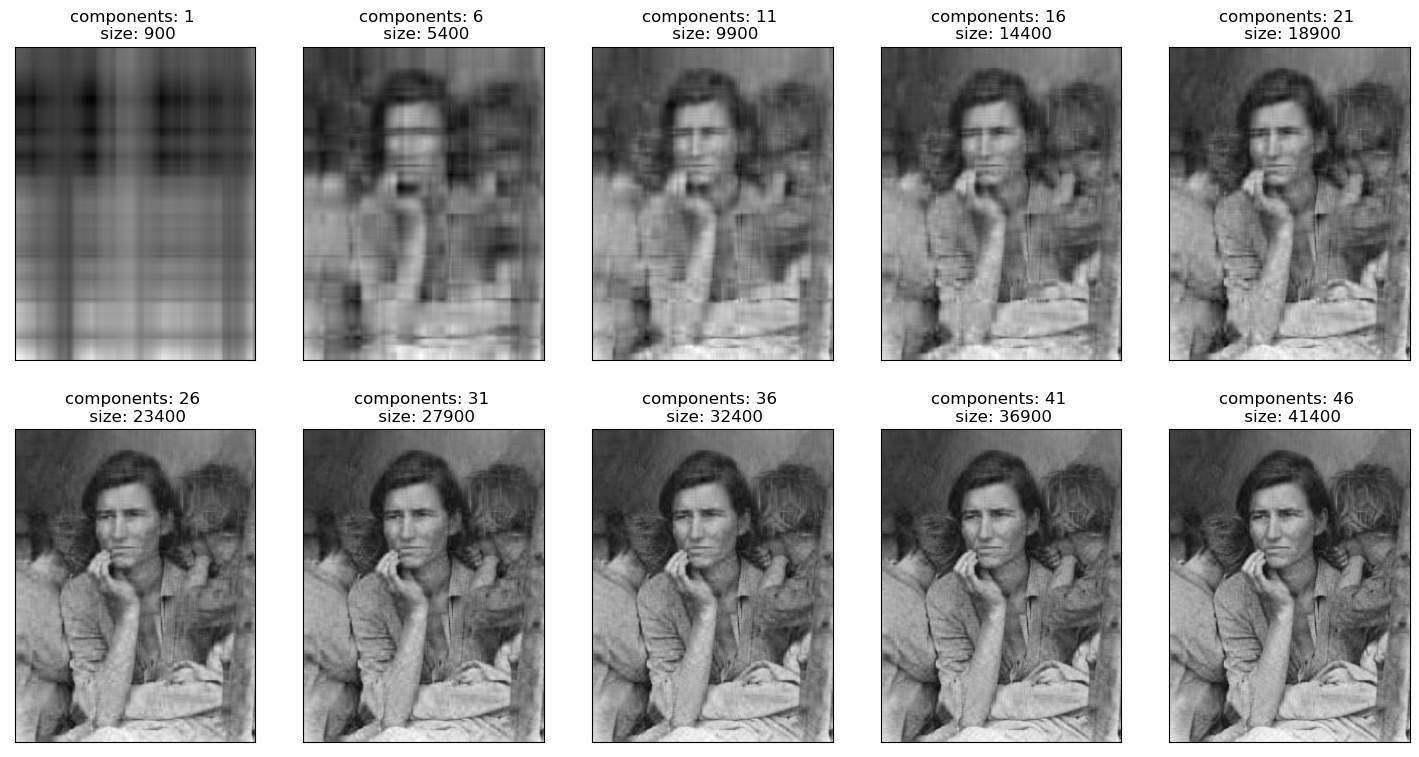

In [51]:
plt.figure(figsize=(2 * 1.8 * 5, 2 * 2.4 * 5))
for n_components in range (1, 51, 5):
    pca = PCA(n_components=n_components).fit(image_array)
    image_pca = pca.transform(image_array)
    plt.subplot(5, 5,1 + n_components // 5)
    plt.imshow(pca.inverse_transform(image_pca), cmap=plt.cm.gray)
    title = 'components: %s \n size: %s' % (n_components, image_pca.size)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())